In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [53]:
data = pd.read_csv('customers_segmentation.csv')
data.head()
#data.head()就是列出前五行

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [54]:
data.drop('CustomerID', axis = 1, inplace = True)
#drop即是

In [55]:
#编码，就变成数字容易计算
encoder = LabelEncoder()
#labelencoder()明显是一个函数，encoder是实例化了一个对象，所以下面encoder的用法才是encoder.xxxxx
data['Gender'] = encoder.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


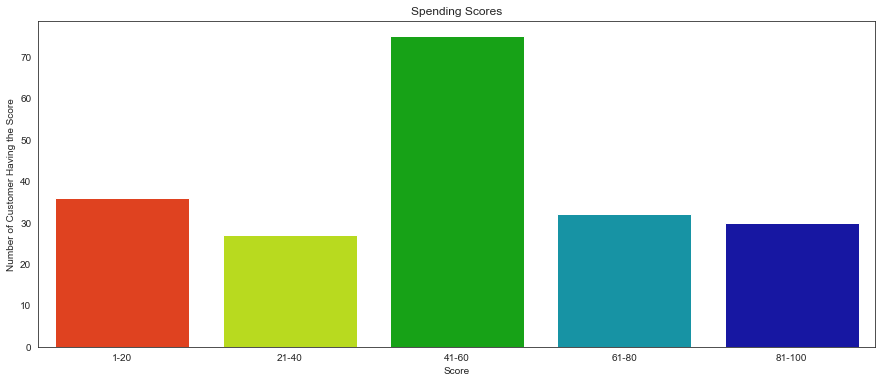

In [56]:
#画图部分暂时跳过吧。。。
## Bar chart to visualize the age distribution

# Define the spending score range and its corresponding value
ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

# Define the X and Y axis label and value 
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

# Plot the visualization
plt.figure(figsize=(15,6)) # Define figure size
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r") # Define the bar chart value
plt.title("Spending Scores") # Define bar chart title
plt.xlabel("Score") # Define bar chart X axis name 
plt.ylabel("Number of Customer Having the Score") # Define bar chart Y axis name 
plt.show() # show plot


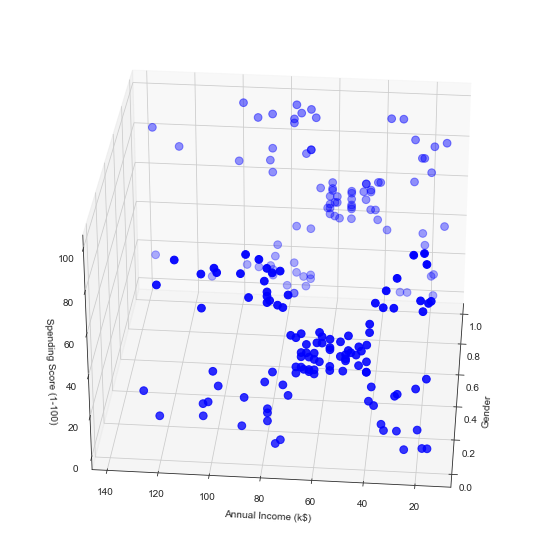

In [57]:
#3d图
sns.set_style("white")
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(data["Gender"], data["Annual Income (k$)"], data["Spending Score (1-100)"], c = 'blue', s = 60)
ax.view_init(30, 185)
plt.xlabel("Gender")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [58]:
scaler = StandardScaler()
#一样，实例化
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


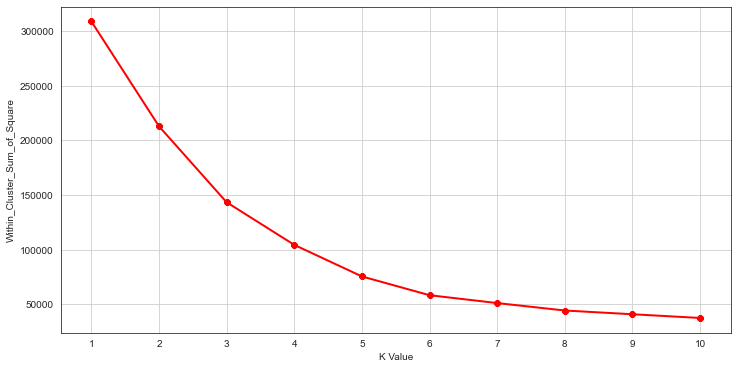

In [59]:
Within_Cluster_Sum_of_Square = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(data)
    Within_Cluster_Sum_of_Square.append(kmeans.inertia_)
plt.figure(figsize = (12, 6))
plt.grid()
plt.plot(range(1, 11), Within_Cluster_Sum_of_Square, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("Within_Cluster_Sum_of_Square")
plt.show()

In [60]:
km = KMeans(n_clusters = 4, n_init = 5)
clusters = km.fit_predict(data)
data["label"] = clusters

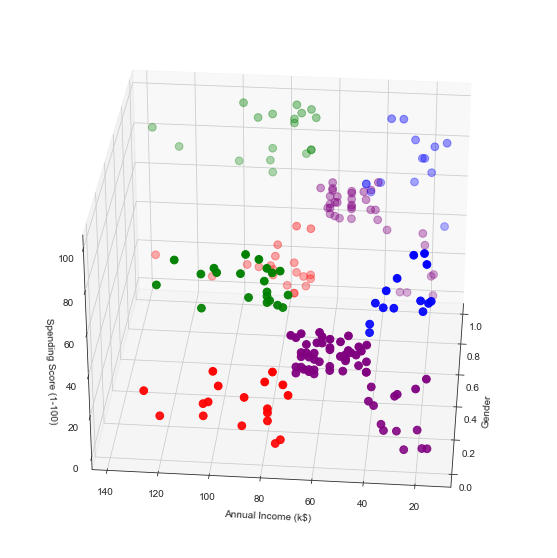

In [61]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Gender"][data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data["Gender"][data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data["Gender"][data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data["Gender"][data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='purple', s=60)

ax.view_init(30, 185)
plt.xlabel("Gender")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [62]:
data[data.label == 1]

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
124,0,23,70,29,1
126,1,43,71,35,1
128,1,59,71,11,1
130,1,47,71,9,1
132,0,25,72,34,1
134,1,20,73,5,1
136,0,44,73,7,1
138,1,19,74,10,1
140,0,57,75,5,1
142,0,28,76,40,1


In [63]:
data[data.label == 0]

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,0
1,1,21,15,81,0
3,0,23,16,77,0
5,0,22,17,76,0
7,0,23,18,94,0
9,0,30,19,72,0
11,0,35,19,99,0
13,0,24,20,77,0
15,1,22,20,79,0
17,1,20,21,66,0
